**Databased analysis of conventional plants in Germany**


# Introduction

This Notebook is a step for step handbook for calculating the emission factors of conventional power plants in Germany.

Only plants, that are mandated to submit generation data are included. This refers to plants with a total nominal electrical power of least 200 MW or single blocks with a nominal elctrical power of at least 100 MW.


## Preparation of Python environment

The following modules and their dependencies are required to run this notebook:
* Pandas
* Numpy
* Matplotlib
* Seaborn


In [1]:
# MODULE IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

## Download of input files and setup of folder structure

* The list of conventional powerplants *blocks.xlsx* needs to be included in the *input* folder. <br><br>
* Powerplant generation data needs to be downloaded from https://transparency.entsoe.eu/. Therefore, use any SFTP client and follow the instructions on https://transparency.entsoe.eu/content/static_content/Static%20content/knowledge%20base/SFTP-Transparency_Docs.html to access the ento-e database. Open the folder *ActualGenerationOutputPerGenerationUnit_16.1.A* and download all files for the relevant years. Include the files into the *input/entsoe* folder. <br><br>
* Emissions and allocations data needs to be downloaded from https://climate.ec.europa.eu/eu-action/eu-emissions-trading-system-eu-ets/union-registry_en#documentation. Access the link, go to section *Phase IV (2021-2030)* - *Reports* and download the file *Verified Emissions for 2021*. Delete the informational rows marked in yellow. Include the file into the */input/EC* folder.

# Data import

In [2]:
# INITIAL SETUP

# data is currently provided for the years of 2016 to 2021
years = [2016, 2017, 2018, 2019, 2020, 2021]

# import main file for German powerplant data including EIC, ETS-ID, electrical and heat power, CHP
blocks = pd.read_excel('input/blocks.xlsx')
# output
blocks.head(10)

ETS-ID               EIC    BNA-ID          City  \
0      19  11WD8SCHW5X---19  BNA0894c       Schwedt   
1      19  11WD8SCHW5X---27  BNA0894d       Schwedt   
2     662  11WD7LUDW2GGT11E  BNA0614b  Ludwigshafen   
3     662  11WD7LUDW2GGT12C  BNA0614b  Ludwigshafen   
4     662  11WD7LUDW5GSDG1Q   BNA0615  Ludwigshafen   
5     662  11WD7LUDW5GSDG2O   BNA0615  Ludwigshafen   
6     739  11WD8DRES5X----D   BNA0207       Dresden   
7     741  11WD2NOR20001055  BNA0969b      Muenchen   
8     750  11WD2S1G2000097U  BNA0683c      Muenchen   
9     750  11WD2S1G3000098K  BNA0683b      Muenchen   

                     Plant name Block name  CHP  Net electrical power [MW_el]  \
0               IKS PCK Schwedt          1    1                           117   
1               IKS PCK Schwedt          2    1                           117   
2                         Mitte       GT11    1                           206   
3                         Mitte       GT12    1                           206   
4                          Sued        GT1    1                           178   
5                          Sued        GT2    1                           167   
6  HKW Dresden Nossener Bruecke        NaN    1                           260   
7                          Nord      2-T20    1                           333   
8                          Sued        GT2    1                           108   
9                          Sued        GT3    1                           108   

   Heat power [MW_th]       Fuel  Fuel emission factor [t/MWh_th]  
0               106.0  crude oil                           0.2639  
1               106.0  crude oil                           0.2639  
2               270.0         NG                           0.2010  
3               270.0         NG                           0.2010  
4               217.0         NG                           0.2010  
5               203.0         NG                           0.2010  
6               455.0         NG                           0.2010  
7               550.0  hard coal                           0.3368  
8                92.0         NG                           0.2010  
9                92.0         NG                           0.2010

In [3]:
# IMPORT OF GENERATION DATA
# RUNTIME: Approx. 5 minutes

# import block-wise generation data (source: entso-e)
pp_gen_data = dict()
months = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]
for y in years:
    pp_gen_data[y] = []
    for m in months:
        pp_gen_data[y].append(pd.read_csv("input/entsoe/" + str(y) + "_" + m + "_ActualGenerationOutputPerGenerationUnit_16.1.A.csv", header=0, delimiter='\t', parse_dates=True))

# output
pp_gen_data[2016][0].head(10)

DateTime ResolutionCode          AreaCode AreaTypeCode  \
0  2016-01-06 14:00:00.000          PT60M  10YSK-SEPS-----K          CTA   
1  2016-01-06 15:00:00.000          PT60M  10YSK-SEPS-----K          CTA   
2  2016-01-06 16:00:00.000          PT60M  10YSK-SEPS-----K          CTA   
3  2016-01-06 17:00:00.000          PT60M  10YSK-SEPS-----K          CTA   
4  2016-01-06 18:00:00.000          PT60M  10YSK-SEPS-----K          CTA   
5  2016-01-06 19:00:00.000          PT60M  10YSK-SEPS-----K          CTA   
6  2016-01-06 20:00:00.000          PT60M  10YSK-SEPS-----K          CTA   
7  2016-01-06 21:00:00.000          PT60M  10YSK-SEPS-----K          CTA   
8  2016-01-06 22:00:00.000          PT60M  10YSK-SEPS-----K          CTA   
9  2016-01-06 23:00:00.000          PT60M  10YSK-SEPS-----K          CTA   

  AreaName MapCode GenerationUnitEIC PowerSystemResourceName ProductionType  \
0   SK CTA      SK  24WG--EBOG41---7           Bohunice TG41        Nuclear   
1   SK CTA      SK  24WG--EBOG41---7           Bohunice TG41        Nuclear   
2   SK CTA      SK  24WG--EBOG41---7           Bohunice TG41        Nuclear   
3   SK CTA      SK  24WG--EBOG41---7           Bohunice TG41        Nuclear   
4   SK CTA      SK  24WG--EBOG41---7           Bohunice TG41        Nuclear   
5   SK CTA      SK  24WG--EBOG41---7           Bohunice TG41        Nuclear   
6   SK CTA      SK  24WG--EBOG41---7           Bohunice TG41        Nuclear   
7   SK CTA      SK  24WG--EBOG41---7           Bohunice TG41        Nuclear   
8   SK CTA      SK  24WG--EBOG41---7           Bohunice TG41        Nuclear   
9   SK CTA      SK  24WG--EBOG41---7           Bohunice TG41        Nuclear   

   ActualGenerationOutput  ActualConsumption  InstalledGenCapacity  \
0                  246.44                NaN                 250.0   
1                  246.41                NaN                 250.0   
2                  246.35                NaN                 250.0   
3                  246.42                NaN                 250.0   
4                  246.33                NaN                 250.0   
5                  246.17                NaN                 250.0   
6                  245.99                NaN                 250.0   
7                  246.19                NaN                 250.0   
8                  246.53                NaN                 250.0   
9                  246.55                NaN                 250.0   

            UpdateTime  
0  2017-09-14 00:14:20  
1  2017-09-14 00:14:20  
2  2017-09-14 00:14:20  
3  2017-09-14 00:14:20  
4  2017-09-14 00:14:20  
5  2017-09-14 00:14:20  
6  2017-09-14 00:14:20  
7  2017-09-14 00:14:20  
8  2017-09-14 00:14:20  
9  2017-09-14 00:14:20

In [4]:
# IMPORT OF EMISSIONS AND ALLOCATION DATA

# import data on verified emissions and free emission allocations (source: EC)
EC_data = pd.read_excel('input/EC/verified_emissions_2021_en.xlsx')
EC_data = EC_data[EC_data.REGISTRY_CODE == 'DE']

# output
EC_data.head(10)

REGISTRY_CODE                     IDENTIFIER_IN_REG  \
1176            DE                        ADM Mainz GmbH   
1177            DE                        Eurowings GmbH   
1178            DE  Handelskonto der Trevo Aviation Ltd.   
1179            DE               CargoLogic Germany GmbH   
1180            DE                              Emirates   
1181            DE        SunExpress ETS holding account   
1182            DE        PEGASUS HAVA TASIMACILIGI A.S.   
1183            DE              Luxaviation Germany GmbH   
1184            DE        Private Wings Flugcharter GmbH   
1185            DE            Emil Capital Partners, LLC   

                      INSTALLATION_NAME  INSTALLATION_IDENTIFIER  \
1176  0010 Feuerungsanlage (Kesselhaus)                      975   
1177                               2034                   207497   
1178                              37070                   200816   
1179                              46300                   215501   
1180                               9807                   201598   
1181                              10201                   200479   
1182                              10690                   200541   
1183                                114                   212160   
1184                              12196                   206844   
1185                              12213                   203172   

     PERMIT_IDENTIFIER  MAIN_ACTIVITY_TYPE_CODE  ALLOCATION_2021  \
1176        14310-0397                       20            32443   
1177        19550-0693                       10               -1   
1178        19550-0115                       10               23   
1179        19550-0711                       10               -1   
1180        19550-0733                       10               -1   
1181        19550-0241                       10             1543   
1182        19550-0237                       10             1288   
1183        19550-0712                       10               -1   
1184        19550-0373                       10               -1   
1185        19550-0260                       10               -1   

      ALLOCATION_RESERVE_2021  ALLOCATION_TRANSITIONAL_2021  \
1176                        0                             0   
1177                       -1                            -1   
1178                        0                             0   
1179                       -1                            -1   
1180                       -1                            -1   
1181                        0                             0   
1182                        0                             0   
1183                       -1                            -1   
1184                       -1                            -1   
1185                       -1                            -1   

      CH_ALLOCATION_2021  ... VERIFIED_EMISSIONS_2012 ALLOCATION_2011  \
1176                  -1  ...                   60208           54405   
1177               17622  ...                      -1              -1   
1178                  -1  ...                     712              -1   
1179                  -1  ...                      -1              -1   
1180                  -1  ...                   39515              -1   
1181                  -1  ...                  468225              -1   
1182                  -1  ...                    2225              -1   
1183                  -1  ...                      -1              -1   
1184                  -1  ...                   10497              -1   
1185                  -1  ...                     547              -1   

      VERIFIED_EMISSIONS_2011  ALLOCATION_2010  VERIFIED_EMISSIONS_2010  \
1176                    61396            54405                    62035   
1177                       -1               -1                       -1   
1178                       -1               -1                       -1   
1179                       -1               -1  

In [5]:
# GENERATION OF EIC AND ETS-ID LISTS

# list of all powerplant block EIC codes
eic_list = blocks['EIC'].unique()

# list of all powerplant location ETS-ID codes
ets_list = blocks['ETS-ID'].unique()

# Calculation of yearly generation

Generation data is provided by entso-e on an hourly basis. The hourly data is aggregated to the per-year level and adjusted for missing data points. The data is EIC-specific, and thus evaluated on the block level.

In [6]:
# CALCULATION OF YEARLY GENERATION PER BLOCK
# RUNTIME: Approx. 30 min

gen = pd.DataFrame(eic_list, columns=['EIC'])
# create empty columns for yearly generation amounts and number of data points
for y in years:
    gen['Generation elec. ' + str(y) + ' [MWh_el]'] = 0
    gen['No. data points ' + str(y)] = 0

# calculate total generation per block per year and extract the number of data points
for y in years:
    gen_data_y = pp_gen_data[y]
    for m in range(12):
        gen_data_m = gen_data_y[m]
        for p in eic_list:
            # extract powerplant-specific hourly generation data (one month)
            gen_data_m_p = gen_data_m[gen_data_m['GenerationUnitEIC']==p]
            gen_m_p = gen_data_m_p.sum()['ActualGenerationOutput']
            # aggregate monthly generation data to per year level
            gen.loc[gen['EIC']==p,'Generation elec. ' + str(y) + ' [MWh_el]'] += gen_m_p

            # extract the number of hourly generation data points
            dp_m_p = len(gen_data_m_p.index)
            # aggregate monthly data points to per year level
            gen.loc[gen['EIC']==p, 'No. data points '+str(y)] += dp_m_p

# if generation is reported for every hour of the year, 8760 data points are available and no adjustemnts are needed
# in case that data is missing, the generation is scaled based on the number of data points available
for index, row in gen.iterrows():
    for y in years:
        if row['No. data points '+str(y)] != 0 & row['No. data points '+str(y)] != 8760:
            # calculate correction factor as 8760/number of data points
            corr_fac = 8760/row['No. data points '+str(y)]
            # adjust generation based on correction factor
            gen.loc[index,'Generation elec. '+str(y) + ' [MWh_el]'] = gen.loc[index,'Generation elec. '+str(y) + ' [MWh_el]'] * corr_fac

# add generation data to the main powerplant block DataFrame
for p in eic_list:
    for y in years:
        blocks.loc[blocks['EIC']==p, 'Generation elec. '+str(y)+' [MWh_el]'] = gen.loc[gen['EIC']==p, 'Generation elec. '+str(y)+' [MWh_el]'].values[0]
        blocks.loc[blocks['EIC']==p, 'No. data points '+str(y)] = int(gen.loc[gen['EIC']==p, 'No. data points '+str(y)])

# output
columns = ['EIC'] + ['Generation elec. ' + str(y) + " [MWh_el]" for y in years] + ['No. data points ' + str(y) for y in years]
blocks.loc[:,columns].head(10)

EIC  Generation elec. 2016 [MWh_el]  \
0  11WD8SCHW5X---19                    7.931348e+05   
1  11WD8SCHW5X---27                    7.294016e+05   
2  11WD7LUDW2GGT11E                    1.517039e+06   
3  11WD7LUDW2GGT12C                    1.417652e+06   
4  11WD7LUDW5GSDG1Q                    1.109093e+06   
5  11WD7LUDW5GSDG2O                    1.261691e+06   
6  11WD8DRES5X----D                    1.474537e+06   
7  11WD2NOR20001055                    1.557678e+06   
8  11WD2S1G2000097U                    9.154619e+04   
9  11WD2S1G3000098K                    1.070943e+05   

   Generation elec. 2017 [MWh_el]  Generation elec. 2018 [MWh_el]  \
0                    7.716718e+05                       648314.25   
1                    8.040417e+05                       811025.00   
2                    1.402270e+06                      1450318.24   
3                    1.406764e+06                      1469136.18   
4                    1.277882e+06                      1131934.27   
5                    1.180330e+06                       954661.79   
6                    1.440658e+06                      1370235.07   
7                    1.428692e+06                      1109165.92   
8                    1.243172e+05                       104722.86   
9                    1.075163e+05                       104747.26   

   Generation elec. 2019 [MWh_el]  Generation elec. 2020 [MWh_el]  \
0                       789048.50                    6.815136e+05   
1                       562484.00                    7.060202e+05   
2                      1470420.00                    1.477277e+06   
3                      1288124.15                    1.327720e+06   
4                      1142469.02                    1.076560e+06   
5                       976565.21                    1.027428e+06   
6                      1410970.59                    1.390362e+06   
7                      1118109.21                    5.962193e+05   
8                       129811.33                    3.042117e+05   
9                       136587.14                    3.083385e+05   

   Generation elec. 2021 [MWh_el]  No. data points 2016  No. data points 2017  \
0                       643387.75                8784.0                8754.0   
1                       635963.00                8784.0                8754.0   
2                      1399557.59                8779.0                8754.0   
3                      1571289.29                8779.0                8754.0   
4                      1272899.93                8779.0                8754.0   
5                      1262035.41                8779.0                8754.0   
6                      1474498.14                8784.0                8754.0   
7                       662376.84                8784.0                8760.0   
8                       261150.59                8784.0                8760.0   
9                       203072.27                8784.0                8760.0   

   No. data points 2018  No. data points 2019  No. data points 2020  \
0                8760.0                8760.0                8784.0   
1                8760.0                8760.0                8784.0   
2                8760.0                8760.0                8784.0   
3                8760.0                8760.0                8784.0   
4                8760.0                8760.0                8784.0   
5                8760.0                8760.0                8784.0   
6                8760.0                8760.0                8784.0   
7                8760.0                8760.0                8784.0   
8                8760.0                8760.0                8784.0   
9                8760.0                8760.0                8784.0   

   No. data points 2021  
0                8760.0  
1                8760.0  
2                8760.0  
3                8760.0  
4                8760.0  
5                8760.0  
6                8760.0  
7       

# Aggregation and accessing allocation/emission data

While generation data is provided on powerplant block level (EIC-specific), emission and allocation data is provided on powerplant installation level (ETS ID-specific). Thus, aggregation of multiple blocks within the same installation has to be done before accessing the ETS data.

In [7]:
# AGGREGATION TO PLANT LEVEL

# iterate through ETS-IDs and aggregate the data
installations = []
for id in ets_list:
    # extract raw data
    id_data_raw = blocks.loc[blocks['ETS-ID']==id]
    id_data = dict()
    id_data['ETS-ID'] = id
    id_data['City'] = id_data_raw['City'].iloc[0]
    id_data['Plant name'] = id_data_raw['Plant name'].iloc[0]
    # nominal heat and electricity power of the blocks get summed
    id_data['Net electrical power [MW_el]'] = id_data_raw['Net electrical power [MW_el]'].sum()
    id_data['Heat power [MW_th]'] = id_data_raw['Heat power [MW_th]'].sum()
    # if one block of the plant uses CHP, the whole plant is marked as CHP plant
    id_data['CHP'] = id_data_raw['CHP'].any()
    # differentiation between single and mixed fuel type plants
    fuels = id_data_raw['Fuel'].unique()
    fuel = fuels[0] if len(fuels)==1 else 'mixed'
    id_data['Fuel'] = fuel
    if fuel == 'mixed':
        id_data['Thermal fuel emission factor [t/MWh_th]'] = np.NaN
    else:
        id_data['Thermal fuel emission factor [t/MWh_th]'] = id_data_raw['Fuel emission factor [t/MWh_th]'].iloc[0]

    for y in years:
        # generation and calculated emissions of the blocks get summed
        gen_id_y = id_data_raw['Generation elec. ' + str(y) + ' [MWh_el]'].sum()
        id_data['Generation elec. ' + str(y) + ' [MWh_el]'] = gen_id_y
    
    installations.append(id_data)
installations = pd.DataFrame(installations)

# output
installations.head(10)

ETS-ID               City                    Plant name  \
0      19            Schwedt               IKS PCK Schwedt   
1     662       Ludwigshafen                         Mitte   
2     739            Dresden  HKW Dresden Nossener Bruecke   
3     741           Muenchen                          Nord   
4     750           Muenchen                          Sued   
5     795         Burghausen                    Burghausen   
6     839            Ensdorf                       Ensdorf   
7     845         Querschied                        Weiher   
8     852            Bexbach                       Bexbach   
9     889  Voelklingen-Fenne             Voelklingen-Fenne   

   Net electrical power [MW_el]  Heat power [MW_th]    CHP       Fuel  \
0                           234               212.0   True  crude oil   
1                           757               960.0   True         NG   
2                           260               455.0   True         NG   
3                           333               550.0   True  hard coal   
4                           616               646.0   True         NG   
5                           120               350.0   True         NG   
6                           389                 0.0   True  hard coal   
7                           656                30.0   True  hard coal   
8                           726                 0.0  False  hard coal   
9                           390               395.0   True  hard coal   

   Thermal fuel emission factor [t/MWh_th]  Generation elec. 2016 [MWh_el]  \
0                                   0.2639                    1.522536e+06   
1                                   0.2010                    5.305475e+06   
2                                   0.2010                    1.474537e+06   
3                                   0.3368                    1.557678e+06   
4                                   0.2010                    1.520957e+06   
5                                   0.2010                    5.714265e+05   
6                                   0.3368                    1.049334e+06   
7                                   0.3368                    1.389828e+06   
8                                   0.3368                    2.030855e+06   
9                                   0.3368                    1.362650e+06   

   Generation elec. 2017 [MWh_el]  Generation elec. 2018 [MWh_el]  \
0                    1.575714e+06                    1.459339e+06   
1                    5.267247e+06                    5.006050e+06   
2                    1.440658e+06                    1.370235e+06   
3                    1.428692e+06                    1.109166e+06   
4                    1.950211e+06                    1.737138e+06   
5                    2.302358e+05                    2.310816e+05   
6                    1.024550e+06                    0.000000e+00   
7                    4.127089e+05                    1.730315e+04   
8                    5.621157e+05                    3.167725e+04   
9                    9.654558e+05                    9.037352e+05   

   Generation elec. 2019 [MWh_el]  Generation elec. 2020 [MWh_el]  \
0                    1.351532e+06                    1.387534e+06   
1                    4.877578e+06                    4.908986e+06   
2                    1.410971e+06                    1.390362e+06   
3                    1.118109e+06                    5.962193e+05   
4                    1.804886e+06                    2.006706e+06   
5                    1.298679e+05                    1.441437e+05   
6                    0.000000e+00                    0.000000e+00   
7                    3.775472e+04                    6.399022e+04   
8                    5.833684e+04                    1.400030e+05   
9                    5.063449e+05                    4.798329e+05   

   Generation elec. 2021 [MWh_el]  
0                    1.279351e+06  
1                    5.505782e+06  
2                    1.474498

In [8]:
# ACCESSING VERIFIED EMISSION AND ALLOCATION DATA

# iterate through ETS-IDs to access verified emissions and free allocations
for y in years:
    for id in ets_list:
        row = EC_data.loc[EC_data['INSTALLATION_IDENTIFIER']==id]
        if row.empty:
            allocation = None
            emissions = None
        else:
            # access allocation and emission data
            allocation = row['ALLOCATION_'+str(y)].values[0]
            emissions = row['VERIFIED_EMISSIONS_'+str(y)].values[0]
            # access generation data for reference
            generation = installations.loc[installations['ETS-ID']==id, 'Generation elec. ' + str(y) + ' [MWh_el]'].values[0]

            # processing of missing entries (-1)
            # if generation is zero, the missing values are caused by the plant not being operational, thus missing are set to zero
            if emissions==-1 and generation==0:
                    emissions = 0
            if allocation==-1 and generation==0:
                    allocation = 0

        installations.loc[installations['ETS-ID']==id, 'Allocation '+str(y)+' [t]'] = allocation
        installations.loc[installations['ETS-ID']==id, 'Emissions '+str(y)+' [t]'] = emissions
    
# processing of missing entries (-1)
# if only one missing entry per installation is found, this is most likely caused by the plant being practically no longer operational with generation close to zero
# in these cases, missing allocation data is set to zero
for id in ets_list:
    count_missing = 0
    for y in years:
        if installations.loc[installations['ETS-ID']==id, 'Allocation '+str(y)+' [t]'].values[0] == -1:
            count_missing +=1
    if count_missing == 1:
        for y in years:
            if installations.loc[installations['ETS-ID']==id, 'Allocation '+str(y)+' [t]'].values[0] == -1:
                installations.loc[installations['ETS-ID']==id, 'Allocation '+str(y)+' [t]'] = 0

# use NaN for missing values instead of -1 for calculation purposes
installations.replace(-1, np.NaN, inplace=True)

# output
columns = ['ETS-ID'] + ['Allocation ' + str(y) + " [t]" for y in years] + ['Emissions ' + str(y) + " [t]" for y in years]
installations.loc[:,columns].head(10)

ETS-ID  Allocation 2016 [t]  Allocation 2017 [t]  Allocation 2018 [t]  \
0      19            1890540.0            1851833.0            1812890.0   
1     662               6569.0               6448.0                  0.0   
2     739             214344.0             184758.0             156134.0   
3     741             228323.0             196808.0             166315.0   
4     750                393.0                338.0                286.0   
5     795             437870.0             429831.0             421793.0   
6     839                233.0                  0.0                  0.0   
7     845               2853.0               2460.0               1039.0   
8     852                  NaN                  NaN                  NaN   
9     889              69359.0              63044.0              56919.0   

   Allocation 2019 [t]  Allocation 2020 [t]  Allocation 2021 [t]  \
0            1773607.0            1734316.0            1736265.0   
1                  0.0                  0.0                  0.0   
2             128432.0             101727.0              63624.0   
3             136809.0             108361.0              71291.0   
4                  0.0                  0.0                  0.0   
5             413754.0             405716.0             194858.0   
6                  0.0                  0.0                  0.0   
7                  0.0                  0.0                  0.0   
8                  NaN                  NaN                  NaN   
9              38356.0              17616.0               5213.0   

   Emissions 2016 [t]  Emissions 2017 [t]  Emissions 2018 [t]  \
0           3766493.0           3842978.0           3789945.0   
1             26730.0              1860.0                23.0   
2            752872.0            741516.0            724518.0   
3           1827049.0           1701489.0           1346205.0   
4              1623.0              2528.0               538.0   
5            684752.0            688971.0            664276.0   
6             63526.0             46654.0                 0.0   
7           1355318.0            408420.0             24624.0   
8           1843866.0            508496.0             37768.0   
9            870263.0            678991.0            646315.0   

   Emissions 2019 [t]  Emissions 2020 [t]  Emissions 2021 [t]  
0           3418710.0           3515850.0           3480163.0  
1             66989.0             58638.0              2532.0  
2            725752.0            713976.0            770563.0  
3           1462508.0            881022.0            971094.0  
4                 NaN                 NaN                 NaN  
5            521038.0            560948.0            580468.0  
6                 0.0                 0.0                 0.0  
7             47980.0             73995.0             95403.0  
8             79358.0            167776.0            263604.0  
9            377923.0            434753.0            335026.0

# Separation of electricity and heat related emissions

Based on the regulation of the EU European Trading Scheme, electricity and heat emissions can be separated. Linear reduction factor and carbon leakage exposure factor are calculated. In combination with the ETS verified emissions, the share of carbon leakage related emissions "sigma" is be calculated.

In [9]:
# CALCULATION OF SIGMA
# define combinations of consecutive years
years_cons = [[y, y+1] for y in years][:-1]

for id in ets_list:
    sigma = np.NaN
    sigma_list = dict()
    # calculation of sigma for each powerplant and set of consecutive years
    for y in years_cons:
        # 2013 is defined as the base year in the EU ETS regulations
        k_0 = y[0] - 2013
        k_1 = y[1] - 2013
        # calculation of linear reduction factors
        lrf_0 = 1 - 0.0174*k_0 if y[0]<=2020 else 0.8782 - 0.022*k_0
        lrf_1 = 1 - 0.0174*k_1 if y[1]<=2020 else 0.8782 - 0.022*k_1
        # calculation of carbon leakage exposure factors
        clef_0 = 0.8 - (0.5/7)*k_0
        clef_1 = 0.8 - (0.5/7)*k_1
        # extraction of emission allocations
        alloc_0 =  installations.loc[installations['ETS-ID']==id, 'Allocation '+str(y[0])+' [t]'].values[0]
        alloc_1 =  installations.loc[installations['ETS-ID']==id, 'Allocation '+str(y[1])+' [t]'].values[0]
        # calculation of sigma
        if alloc_0 == 0 and alloc_1 == 0:
            sigma_y = 0
        else:
            sigma_y = (alloc_0*lrf_1*clef_1 - alloc_1*lrf_0*clef_0)/(alloc_1*lrf_0*(1-clef_0) - alloc_0*lrf_1*(1-clef_1))
        sigma_list[str(y)] = sigma_y
        
    # special case for zero heat emissions over all years
    if all(sigma_y == 0 for sigma_y in sigma_list.values()):
        sigma = 0
        installations.loc[installations['ETS-ID']==id, 'Sigma'] = sigma
        continue

    # zeros are removed since they typically occur when the plant is not operational
    sigma_list = {y:sigma_y for y,sigma_y in sigma_list.items() if sigma_y!=0}

    # iterate through consecutive sigma values and identify occasions with a small deviation
    success = False
    for y_1, sigma_1 in sorted(list(sigma_list.items()), key=lambda x:x[0].lower(), reverse=True):
        # define years and sigmas for consecutive values
        y_1_list = str.split(y_1[1:-1], sep=',')
        y_1_list = [int(x.strip(' ')) for x in y_1_list]
        y_0_list = [x-1 for x in y_1_list]
        if str(y_0_list) in sigma_list.keys():
            sigma_0 = sigma_list[str(y_0_list)]
        else:
            continue
        
        # conditions: max. 10% relative difference or max. 0.01 absolute difference
        if abs(1-(sigma_1/sigma_0)) <= 0.1 or abs(sigma_1-sigma_0) <= 0.01:
            # calculation of the average sigma
            sigma_avg = (sigma_0+sigma_1)/2

            # only allow realistic values between 0 and 1
            if sigma_avg >= 0 and sigma_avg <= 1:
                sigma = sigma_avg
                success = True
            
            # round values slightly below 0 to 0 and values slightly above 1 to 1
            elif sigma_avg < 0 and sigma_avg >= -0.1:
                sigma = 0
                success = True
            elif sigma_avg > 1 and sigma_avg <= 1.1:
                sigma = 1
                success = True

        if success:
            installations.loc[installations['ETS-ID']==id, 'Sigma year'] = y_0_list[1]
            installations.loc[installations['ETS-ID']==id, 'Sigma'] = sigma
            break
    
    installations.loc[installations['ETS-ID']==id, 'Sigma'] = sigma

# output
columns = ['ETS-ID', 'Sigma year', 'Sigma']
installations.loc[:,columns].head(10)

ETS-ID  Sigma year     Sigma
0      19      2019.0  0.962762
1     662         NaN       NaN
2     739      2019.0  0.000000
3     741      2019.0  0.000000
4     750         NaN       NaN
5     795      2019.0  1.000000
6     839         NaN       NaN
7     845         NaN       NaN
8     852         NaN       NaN
9     889      2017.0  0.274850

In [10]:
# CALCULATION OF ANNUAL HEAT GENERATION AND HEAT/ELECTRICITY-RELATED EMISSIONS

# definition of heat benchmark
hb = 0.22428 # in t/MWh_th, original value 62,3 t/TJ

# iterate through years and powerplant locations to calculate the heat generation from the allocation data
for id in ets_list:
    for y in years:
        # preparation of linear reduction factor, carbon leakage exposure factor, emission allocations and sigma
        k = y - 2013
        lrf = 1 - 0.0174*k if y<=2020 else 0.8782 - 0.022*k
        clef = 0.8 - (0.5/7)*k
        alloc = installations.loc[installations['ETS-ID']==id, 'Allocation '+str(y)+' [t]'].values[0]
        sigma = installations.loc[installations['ETS-ID']==id, 'Sigma'].values[0]

        # calculation of annual heat generation
        gen_heat = alloc / (hb * lrf * (sigma + (1 - sigma) * clef))

        # calculation of annual heat-related emissions
        em_heat = gen_heat * hb

        # calculation of annual electricity-related emissions
        em_total = installations.loc[installations['ETS-ID']==id, 'Emissions '+str(y)+' [t]'].values[0]
        em_elec = em_total - em_heat

        installations.loc[installations['ETS-ID']==id, 'Generation heat ' + str(y) + ' [MWh_th]'] = gen_heat
        installations.loc[installations['ETS-ID']==id, 'Emissions (heat) ' + str(y) + ' [t]'] = em_heat
        installations.loc[installations['ETS-ID']==id, 'Emissions (elec.) ' + str(y) + ' [t]'] = em_elec

# output
columns = ['ETS-ID', 'Sigma'] + ['Generation heat ' + str(y) + " [MWh_th]" for y in years] + ['Emissions (heat) ' + str(y) + " [t]" for y in years] + ['Emissions (elec.) ' + str(y) + " [t]" for y in years]
installations.loc[:,columns].head(10)

ETS-ID     Sigma  Generation heat 2016 [MWh_th]  \
0      19  0.962762                   9.032976e+06   
1     662       NaN                            NaN   
2     739  0.000000                   1.721545e+06   
3     741  0.000000                   1.833820e+06   
4     750       NaN                            NaN   
5     795  1.000000                   2.059861e+06   
6     839       NaN                            NaN   
7     845       NaN                            NaN   
8     852       NaN                            NaN   
9     889  0.274850                   4.663992e+05   

   Generation heat 2017 [MWh_th]  Generation heat 2018 [MWh_th]  \
0                   9.037923e+06                   9.040975e+06   
1                            NaN                            NaN   
2                   1.721625e+06                   1.721760e+06   
3                   1.833910e+06                   1.834030e+06   
4                            NaN                            NaN   
5                   2.059859e+06                   2.059862e+06   
6                            NaN                            NaN   
7                            NaN                            NaN   
8                            NaN                            NaN   
9                   4.663942e+05                   4.664000e+05   

   Generation heat 2019 [MWh_th]  Generation heat 2020 [MWh_th]  \
0                   9.041472e+06                   9.040972e+06   
1                            NaN                            NaN   
2                   1.721446e+06                   1.721595e+06   
3                   1.833727e+06                   1.833867e+06   
4                            NaN                            NaN   
5                   2.059859e+06                   2.059862e+06   
6                            NaN                            NaN   
7                            NaN                            NaN   
8                            NaN                            NaN   
9                   3.508949e+05                   1.816393e+05   

   Generation heat 2021 [MWh_th]  Emissions (heat) 2016 [t]  \
0                   1.135071e+07               2.025916e+06   
1                            NaN                        NaN   
2                   1.767452e+06               3.861080e+05   
3                   1.980439e+06               4.112890e+05   
4                            NaN                        NaN   
5                   1.237277e+06               4.619857e+05   
6                            NaN                        NaN   
7                            NaN                        NaN   
8                            NaN                        NaN   
9                   7.512654e+04               1.046040e+05   

   Emissions (heat) 2017 [t]  Emissions (heat) 2018 [t]  \
0               2.027025e+06               2.027710e+06   
1                        NaN                        NaN   
2               3.861260e+05               3.861562e+05   
3               4.113094e+05               4.113363e+05   
4                        NaN                        NaN   
5               4.619852e+05               4.619858e+05   
6                        NaN                        NaN   
7                        NaN                        NaN   
8                        NaN                        NaN   
9               1.046029e+05               1.046042e+05   

   Emissions (heat) 2019 [t]  Emissions (heat) 2020 [t]  \
0               2.027821e+06               2.027709e+06   
1                        NaN                        NaN   
2               3.860858e+05               3.861193e+05   
3               4.112683e+05               4.112996e+05   
4                        NaN                        NaN   
5               4.619853e+05               4.619859e+05   
6                        NaN                        NaN   
7                        NaN                        NaN   
8                        NaN                        NaN  

# Emission factors

The yearly installation-specific emission factor is calculated using electricity-related emissions and generation data. Annual emission factors are plotted grouped by individual installations and by fuel type

## Calculation of annual emission factors

In [11]:
# CALCULATION OF EMISSION FACTOR

# iterate through years and installations to calculate the emission factors
for id in ets_list:
    em_fac_list = []
    for y in years:
        # access generation and emission data
        gen = installations.loc[installations['ETS-ID']==id, 'Generation elec. '+str(y)+' [MWh_el]'].values[0]
        em_elec = installations.loc[installations['ETS-ID']==id, 'Emissions (elec.) '+str(y)+' [t]'].values[0]

        # calculation of emission factor
        if em_elec == 0 or gen == 0:
            em_fac = np.NaN
        else:
            em_fac = em_elec / gen
        em_fac_list.append(em_fac)
        installations.loc[installations['ETS-ID']==id, 'Emission factor ' + str(y) + ' [t/MWh_el]'] = em_fac

    # remove nan entries and unrealistically low/high values
    em_fac_list = [x for x in em_fac_list if str(x) != 'nan']
    em_fac_list = [x for x in em_fac_list if x<5 and x>-0.1]
    # calculate average emission factor
    if em_fac_list:
        em_fac_avg = sum(em_fac_list) / len(em_fac_list)
    else:
        em_fac_avg = np.NaN
    installations.loc[installations['ETS-ID']==id, 'Emission factor avg. [t/MWh_el]'] = em_fac_avg

# output
columns = ['ETS-ID', 'Sigma', 'Emission factor avg. [t/MWh_el]'] + ['Emission factor ' + str(y) + " [t/MWh_el]" for y in years]
installations.loc[:,columns].head(10)

ETS-ID     Sigma  Emission factor avg. [t/MWh_el]  \
0      19  0.962762                         1.055874   
1     662       NaN                              NaN   
2     739  0.000000                         0.245441   
3     741  0.000000                         0.863055   
4     750       NaN                              NaN   
5     795  1.000000                         0.810328   
6     839       NaN                              NaN   
7     845       NaN                              NaN   
8     852       NaN                              NaN   
9     889  0.274850                         0.610654   

   Emission factor 2016 [t/MWh_el]  Emission factor 2017 [t/MWh_el]  \
0                         1.143209                         1.152464   
1                              NaN                              NaN   
2                         0.248732                         0.246686   
3                         0.908891                         0.903050   
4                              NaN                              NaN   
5                         0.389842                         0.985884   
6                              NaN                              NaN   
7                              NaN                              NaN   
8                              NaN                              NaN   
9                         0.561890                         0.594940   

   Emission factor 2018 [t/MWh_el]  Emission factor 2019 [t/MWh_el]  \
0                         1.207557                         1.029120   
1                              NaN                              NaN   
2                         0.246937                         0.240732   
3                         0.842857                         0.940194   
4                              NaN                              NaN   
5                         0.875406                         0.454714   
6                              NaN                              NaN   
7                              NaN                              NaN   
8                              NaN                              NaN   
9                         0.599413                         0.590950   

   Emission factor 2020 [t/MWh_el]  Emission factor 2021 [t/MWh_el]  
0                         1.072508                         0.730390  
1                              NaN                              NaN  
2                         0.235807                         0.253753  
3                         0.787835                         0.795501  
4                              NaN                              NaN  
5                         0.686552                         1.469572  
6                              NaN                              NaN  
7                              NaN                              NaN  
8                              NaN                              NaN  
9                         0.821150                         0.495583

## Analysis and plotting

In [12]:
# DATA PREPARATION
# define unique fuel types
fuel_types = list(installations['Fuel'].unique())
fuel_types.remove('mixed')

# create long format DataFrame containing ETS-ID, Fuel Type, Year, Emission factors
em_data_raw = installations[installations['Emission factor avg. [t/MWh_el]'].notna()]
em_data = []
for id in em_data_raw['ETS-ID'].unique():
    for y in years:
        em_data_y = []
        em_data_y.append(id)
        em_data_y.append(y)
        em_data_y.append(em_data_raw.loc[em_data_raw['ETS-ID']==id, 'Fuel'].values[0])
        em_data_y.append(em_data_raw.loc[em_data_raw['ETS-ID']==id, 'Emission factor '+str(y)+' [t/MWh_el]'].values[0])
        em_data.append(em_data_y)
em_data = pd.DataFrame(em_data, columns=['ETSID', 'Year', 'Fuel', 'Emission factor [t/MWh_el]'])
em_data = em_data[em_data['Emission factor [t/MWh_el]'].notna()]


In [13]:
# CALCULATION OF AVERAGE EMISSION FACTOR PER FUEL TYPE

em_fac_avg = dict()
for f in fuel_types:
    total_gen = 0
    total_em_elec = 0
    for id in ets_list:
        # filter by fuel type
        if installations.loc[installations['ETS-ID']==id]['Fuel'].values[0] == f:
            for y in years:
                # access generation and emission data
                gen = installations.loc[installations['ETS-ID']==id, 'Generation elec. '+str(y)+' [MWh_el]'].values[0]
                em_elec = installations.loc[installations['ETS-ID']==id, 'Emissions (elec.) '+str(y)+' [t]'].values[0]
                # add values to fuel type-specific sum
                if str(gen)!='nan' and str(em_elec)!='nan':
                    total_gen += gen
                    total_em_elec += em_elec
                    
    # calculate average emission factor
    if total_gen > 0:
        em_fac_avg[f] = total_em_elec / total_gen
    else:
        em_fac_avg[f] = np.NaN
    
# output
print("Average emission factors per fuel type:")
for f in fuel_types:
    print(f + ": " + str(round(em_fac_avg[f],2)) + " t/MWh_el")

Average emission factors per fuel type:
crude oil: 1.06 t/MWh_el
NG: 0.36 t/MWh_el
hard coal: 0.93 t/MWh_el
BFG: 2.68 t/MWh_el
lignite: 1.01 t/MWh_el
heavy fuel oil: 1.09 t/MWh_el
light fuel oil: nan t/MWh_el


In [14]:
# SETUP FOR PLOTTING
sns.set(font_scale = 1.25)
rcParams['figure.figsize'] = 15,8

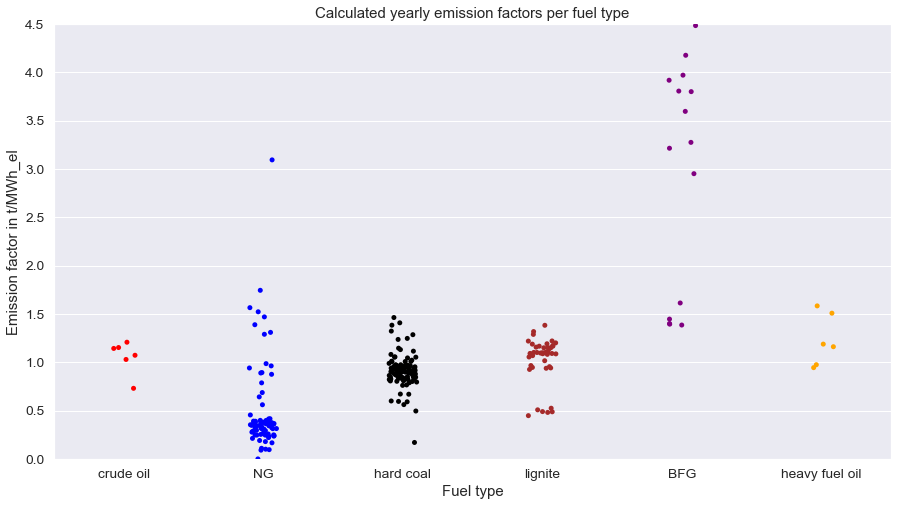

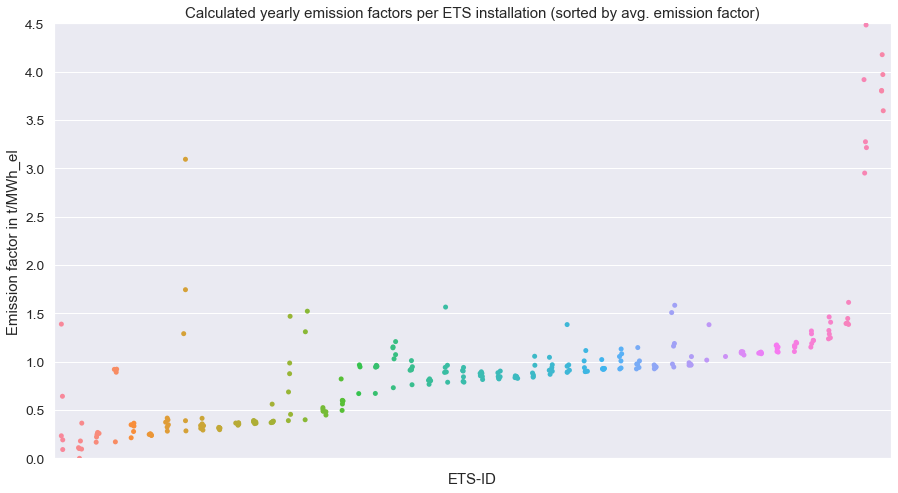

In [15]:
# PLOTTING OF EMISSION FACTORS

# for plotting purposes, mixed fuel type plants are exluded
em_data_plot = em_data.loc[em_data['Fuel']!='mixed']
# color palette for fuel types
colors_ft = {'crude oil': 'red', 'NG': 'blue', 'hard coal': 'black', 'BFG': 'purple', 'lignite': 'brown', 'heavy fuel oil': 'orange', 'light fuel oil': 'green'}

# yearly emission factors grouped by fuel type
em_plot = sns.stripplot(data=em_data_plot, x='Fuel', y='Emission factor [t/MWh_el]', palette=colors_ft)
em_plot.set(title="Calculated yearly emission factors per fuel type", ylim=(0, 4.5), xlabel='Fuel type', ylabel='Emission factor in t/MWh_el')
plt.savefig('output/plots/emission_factor-fuel_type.png')
plt.show()

# yearly emission factors grouped by individual installations
em_plot = sns.stripplot(data=em_data_plot, x='ETSID', y='Emission factor [t/MWh_el]', order=em_data_plot.sort_values('Emission factor [t/MWh_el]').ETSID.unique())
em_plot.set(title="Calculated yearly emission factors per ETS installation (sorted by avg. emission factor)", ylim=(0, 4.5), xticklabels=[], xlabel='ETS-ID', ylabel='Emission factor in t/MWh_el')
plt.savefig('output/plots/emission_factor-ETSID.png')
plt.show()

# Utilization ratio

The "Umweltbundesamt" provides thermal, fuel-specific/fuel-mix specific emission factors. In combination with the installation-specifc emission factors calculated above, the utilization ratio of each installation can be calculated.
<br><br>
Overview of emission factors (in t CO2 / MWh):
* Natural gas (NG): 0.2010
* Hard coal: 0.3368
* Lignite: Different values for the German mining areas of "Rheinland", "Lausitz", "Mitteldeutschland" and "Helmstedt"
* Oil: Different values for crude oil, light fuel oil and heavy fuel oil
* Blast furnace gas (BFG): 0.9319

<br>
Full source: Juhrich, K. & Umweltbundesamt, Fachgebiet Emissionssituation. (2009, June). CO2-Emissionsfaktoren für fossile Brennstoffe - Aktualisierung 2022. Climate Change, 28/2022, Article ISSN 1862-4359. https://www.umweltbundesamt.de/publikationen/co2-emissionsfaktoren-fuer-fossile-brennstoffe-0

## Calculation of annual utilization ratio

In [16]:
# CALCULATION OF UTILIZATION FACTOR

# iterate through years and locations to calculate the utilization factors
for id in ets_list:
    utilization_list = []
    for y in years:
        # get emission factor data
        em_fac = installations.loc[installations['ETS-ID']==id, 'Emission factor '+str(y)+' [t/MWh_el]'].values[0]
        fuel_fac_th = installations.loc[installations['ETS-ID']==id, 'Thermal fuel emission factor [t/MWh_th]'].values[0]
        
        # calculation of utilization factor
        utilization = fuel_fac_th / em_fac
        utilization_list.append(utilization)
        installations.loc[installations['ETS-ID']==id, 'Utilization ratio ' + str(y) + ' [MWh_el/MWh_th]'] = utilization

    # remove nan entries and unrealistically low/high values
    utilization_list = [x for x in utilization_list if str(x) != 'nan']
    utilization_list = [x for x in utilization_list if x>=0 and x<=1]
    # calculate average utilization_factor
    if utilization_list:
        utilization_avg = sum(utilization_list) / len(utilization_list)
    else:
        utilization_avg = np.NaN
    installations.loc[installations['ETS-ID']==id, 'Utilization ratio avg. [MWh_el/MWh_th]'] = utilization_avg

# output
columns = ['ETS-ID', 'Sigma', 'Emission factor avg. [t/MWh_el]', 'Utilization ratio avg. [MWh_el/MWh_th]'] + ['Utilization ratio ' + str(y) + " [MWh_el/MWh_th]" for y in years]
installations.loc[:,columns].head(10)

ETS-ID     Sigma  Emission factor avg. [t/MWh_el]  \
0      19  0.962762                         1.055874   
1     662       NaN                              NaN   
2     739  0.000000                         0.245441   
3     741  0.000000                         0.863055   
4     750       NaN                              NaN   
5     795  1.000000                         0.810328   
6     839       NaN                              NaN   
7     845       NaN                              NaN   
8     852       NaN                              NaN   
9     889  0.274850                         0.610654   

   Utilization ratio avg. [MWh_el/MWh_th]  \
0                                0.257029   
1                                     NaN   
2                                0.819388   
3                                0.392036   
4                                     NaN   
5                                0.303443   
6                                     NaN   
7                                     NaN   
8                                     NaN   
9                                0.564514   

   Utilization ratio 2016 [MWh_el/MWh_th]  \
0                                0.230841   
1                                     NaN   
2                                0.808100   
3                                0.370561   
4                                     NaN   
5                                0.515593   
6                                     NaN   
7                                     NaN   
8                                     NaN   
9                                0.599406   

   Utilization ratio 2017 [MWh_el/MWh_th]  \
0                                0.228988   
1                                     NaN   
2                                0.814802   
3                                0.372958   
4                                     NaN   
5                                0.203878   
6                                     NaN   
7                                     NaN   
8                                     NaN   
9                                0.566108   

   Utilization ratio 2018 [MWh_el/MWh_th]  \
0                                0.218540   
1                                     NaN   
2                                0.813973   
3                                0.399593   
4                                     NaN   
5                                0.229608   
6                                     NaN   
7                                     NaN   
8                                     NaN   
9                                0.561883   

   Utilization ratio 2019 [MWh_el/MWh_th]  \
0                                0.256433   
1                                     NaN   
2                                0.834952   
3                                0.358224   
4                                     NaN   
5                                0.442036   
6                                     NaN   
7                                     NaN   
8                                     NaN   
9                                0.569930   

   Utilization ratio 2020 [MWh_el/MWh_th]  \
0                                0.246059   
1                                     NaN   
2                                0.852393   
3                                0.427501   
4                                     NaN   
5                                0.292767   
6                                     NaN   
7                                     NaN   
8                                     NaN   
9                                0.410156   

   Utilization ratio 2021 [MWh_el/MWh_th]  
0                                0.361314  
1                                     NaN  
2                                0.792108  
3                                0.423381  
4                                     NaN  
5                                0.136775  
6                                     NaN  
7                                     NaN  
8             

## Analysis and plotting

In [17]:
# DATA PREPARATION

# create long format DataFrame containing ETS-ID, Fuel Type, Year, Utilization rate
ut_data_raw = installations[installations['Utilization ratio avg. [MWh_el/MWh_th]'].notna()]
ut_data = []
for id in ut_data_raw['ETS-ID'].unique():
    for y in years:
        
        ut_data_y = []
        ut_data_y.append(id)
        ut_data_y.append(y)
        ut_data_y.append(ut_data_raw.loc[ut_data_raw['ETS-ID']==id, 'Fuel'].values[0])
        ut_data_y.append(ut_data_raw.loc[ut_data_raw['ETS-ID']==id, 'Utilization ratio '+str(y)+' [MWh_el/MWh_th]'].values[0])
        ut_data.append(ut_data_y)
ut_data = pd.DataFrame(ut_data, columns=['ETSID', 'Year', 'Fuel', 'Utilization ratio [MWh_el/MWh_th]'])
ut_data = ut_data[ut_data['Utilization ratio [MWh_el/MWh_th]'].notna()]

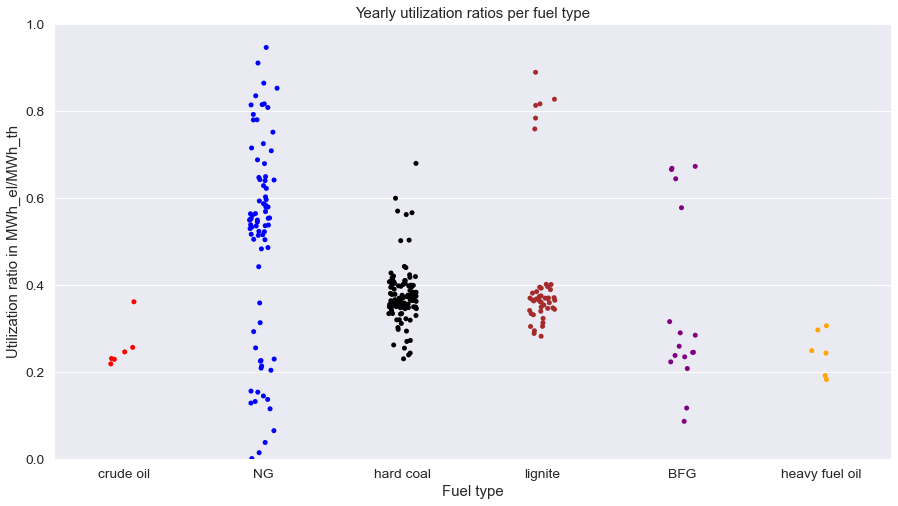

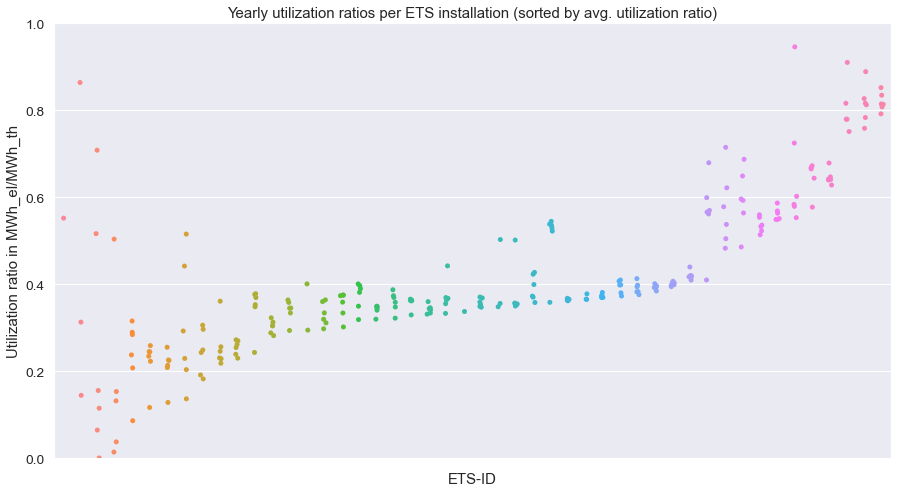

In [18]:
# PLOTTING OF UTILIZATION FACTORS

# yearly utilization factors grouped by fuel type
ut_plot = sns.stripplot(data=ut_data, x='Fuel', y='Utilization ratio [MWh_el/MWh_th]', palette=colors_ft)
ut_plot.set(title="Yearly utilization ratios per fuel type", ylim=(0, 1), xlabel='Fuel type', ylabel='Utilization ratio in MWh_el/MWh_th')
plt.savefig('output/plots/utilization_ratio-fuel_type.png')
plt.show()

# yearly emission factors grouped by individual installations
ut_plot = sns.stripplot(data=ut_data, x='ETSID', y='Utilization ratio [MWh_el/MWh_th]', order=ut_data.sort_values('Utilization ratio [MWh_el/MWh_th]').ETSID.unique())
ut_plot.set(title="Yearly utilization ratios per ETS installation (sorted by avg. utilization ratio)", ylim=(0, 1), xticklabels=[], xlabel='ETS-ID', ylabel='Utilization ratio in MWh_el/MWh_th')
plt.savefig('output/plots/utilization_ratio-ETSID.png')
plt.show()

# Output

Additionally to the block-wise input file, three output files are generated:
* Block-wise (long format): Yearly generation
* Installation-wise (wide format): Plant information overview containing fuel type, sigma, heat share, avg. emission factor
* Installation-wise (long format): Detailed yearly values including heat/electricity generation, emissions, emission factor, ...

In [19]:
# PREPARE BLOCK-WISE LONG FORMAT (GENERATION DATA)

out_block = []
for eic in eic_list:
    for y in years:
        # access generation information
        gen = blocks.loc[blocks['EIC']==eic, 'Generation elec. '+str(y)+' [MWh_el]'].values[0]
        bna = blocks.loc[blocks['EIC']==eic, 'BNA-ID'].values[0]
        bna_name = blocks.loc[blocks['EIC']==eic, 'Name BNA'].values[0]
        plant_name = blocks.loc[blocks['EIC']==eic, 'Plant name'].values[0]
        block_name = str(blocks.loc[blocks['EIC']==eic, 'Block name'].values[0]) if str(blocks.loc[blocks['EIC']==eic, 'Block name'].values[0])!='nan' else ""
        name = plant_name + " " + block_name
        # store information
        out_block.append([eic, bna, bna_name, name, y, gen])
# convert to DataFrame
out_block = pd.DataFrame(out_block, columns=['EIC', 'BNA-ID', 'Name BNA', 'Plant & Block name', 'Year', 'Generation elec. [MWh_el]'])

KeyError: 'Name BNA'

In [20]:
# PREPARE INSTALLATION-WISE WIDE FORMAT
# note: sigma, heat share, and emission factor are stored for the year, for which sigma was calculated
#############################################################################################################
# WORK IN PROGRESS

out_installation_wide = []
for id in ets_list:
    # access information
    ft = installations.loc[installations['ETS-ID']==id, 'Fuel'].values[0]
    sigma = installations.loc[installations['ETS-ID']==id, 'Sigma'].values[0]
    sigma_year = installations.loc[installations['ETS-ID']==id, 'Sigma year'].values[0]
    if str(sigma_year) != 'nan':
        sigma_year = int(sigma_year)
        em_fac = installations.loc[installations['ETS-ID']==id, 'Emission factor ' + str(sigma_year) + ' [t/MWh_el]'].values[0]
        gen = installations.loc[installations['ETS-ID']==id, 'Generation elec. ' + str(sigma_year) + ' [MWh_el]'].values[0]
        heat_gen = installations.loc[installations['ETS-ID']==id, 'Generation heat ' + str(sigma_year) + ' [MWh_th]'].values[0]
        # calculation of heat generation share
        heat_share = heat_gen / gen
    else:
        em_fac = np.NaN
        heat_share = np.NaN
    
    # store information
    out_installation_wide.append([id, ft, sigma, heat_share, em_fac])
# convert to DataFrame
out_installation_wide = pd.DataFrame(out_installation_wide, columns=['ETS-ID', 'Fuel type', 'Sigma', 'Heat share', 'Emission factor'])
#############################################################################################################

C:\Users\Freddy\.conda\envs\Lecture\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in double_scalars


In [21]:
# PREPARE INSTALLATION-WISE LONG FORMAT
out_installation_long = []
for id in ets_list:
    for y in years:
        # access information
        gen = installations.loc[installations['ETS-ID']==id, 'Generation elec. ' + str(y) + ' [MWh_el]'].values[0]
        em = installations.loc[installations['ETS-ID']==id, 'Emissions ' + str(y) + ' [t]'].values[0]
        em_elec = installations.loc[installations['ETS-ID']==id, 'Emissions (elec.) ' + str(y) + ' [t]'].values[0]
        em_heat = installations.loc[installations['ETS-ID']==id, 'Emissions (heat) ' + str(y) + ' [t]'].values[0]
        em_fac = installations.loc[installations['ETS-ID']==id, 'Emission factor ' + str(y) + ' [t/MWh_el]'].values[0]
        ut_fac = installations.loc[installations['ETS-ID']==id, 'Utilization ratio ' + str(y) + ' [MWh_el/MWh_th]'].values[0]
        
        # store information
        out_installation_long.append([id, y, gen, em, em_elec, em_heat, em_fac, ut_fac])

# convert to DataFrame
out_installation_long = pd.DataFrame(out_installation_long, columns=['ETS-ID', 'Year', 'Generation elec. [MWh_el]', 'Emissions [MWh]', 'Emissions (electricity) [MWh_el]', 'Emissions (heat) [MWh_th]', 'Emission factor [t/MWh_el]', 'Utilization ratio [MWh_el/MWh_th]'])

In [22]:
# EXPORT OUTPUT DATA
out_block.to_excel('output/block-generation.xlsx', sheet_name='Generation data', float_format="%.3f", index=False)
out_installation_wide.to_excel('output/installation-results.xlsx', sheet_name='Installation results', float_format="%.3f", index=False)
out_installation_long.to_excel('output/installation-results-yearly.xlsx', sheet_name='Yearly results', float_format="%.3f", index=False)

AttributeError: 'list' object has no attribute 'to_excel'

# Comparison of utilization ratio to KIT data

In [23]:
# PREPARE KIT DATA AND MERGE TO EIC DATASET

# assign utilization ratio to EIC for the values calculated above
ut_eic = []
for id in eic_list:
    ets = blocks.loc[blocks['EIC']==id, 'ETS-ID'].values[0]
    fuel = blocks.loc[blocks['EIC']==id, 'Fuel'].values[0]
    ut_eic.append([id, fuel, installations.loc[installations['ETS-ID']==ets, 'Utilization ratio avg. [MWh_el/MWh_th]'].values[0]])
ut_eic = pd.DataFrame(ut_eic, columns=['EIC', 'Fuel', 'Utilization ratio'])
ut_eic = ut_eic[ut_eic['Utilization ratio'].notna()]

# import and preparation of KIT data
data_kit = pd.read_csv('input/KIT/kraftwerke_wirkungsgrad.csv')
data_kit = data_kit.drop(columns=['PowerSystemResourceName', 'Fuel', 'Fuel_specification', 'bnetza_id', 'name_bnetza'])
data_kit.rename(columns={'GenerationUnitEIC': 'EIC'}, inplace=True)

# merge the two data sets
comp = pd.merge(ut_eic, data_kit, how='inner')

# output
comp.head(10)

FileNotFoundError: [Errno 2] No such file or directory: 'input/KIT/kraftwerke_wirkungsgrad.csv'

In [24]:
# PLOT COMPARISON OF UTILIZATION RATE AND KIT EFFICIENCY

# plotting
rcParams['figure.figsize'] = 10, 10
comp_plot = sns.scatterplot(data=comp, x='Utilization ratio', y='Efficiency', hue='Fuel', palette=colors_ft)
comp_plot.set(title="Comparison of utilization ratio to KIT efficiency", xlim=(0.15,0.9), ylim=(0.15, 0.9), xlabel='Utilization ratio', ylabel='Efficiency')
plt.plot([0, 1], [0, 1], linewidth=2)
plt.savefig('output/plots/KIT_efficiency-utilization_ratio.png')
plt.show()

NameError: name 'comp' is not defined

# Evaluation of heat extraction for non-EIC powerplants

The data set is extended to all ETS-registered installations with the main acticity "combustion of fuels". This list of installations is not matched to EIC, to allow for the consideration of smaller plants. For this extended data set, the methodology from above is used with small adjustments to calculate Sigma, heat- and electricity related emissions, and heat generation for each plant.

In [25]:
# EVALUATION OF HEAT EXTRACTION FOR NON-EIC PLANTS

# extraction of all German powerplant EUETS identifiers with Activity=20 (combustion of fuels)
EC_data_all = EC_data[EC_data.MAIN_ACTIVITY_TYPE_CODE == 20]
ets_list_all = EC_data_all['INSTALLATION_IDENTIFIER'].unique()

# dataframe preparation
installations_all = []
for i in ets_list_all:
    etsid = i
    name = EC_data_all.loc[EC_data['INSTALLATION_IDENTIFIER']==i, 'INSTALLATION_NAME']
    installations_all.append([etsid, name])
installations_all = pd.DataFrame(installations_all, columns=['ETS-ID', 'Name ETS'])

# accessing of emission and allocation data
for y in years:
    for id in ets_list_all:
        row = EC_data_all.loc[EC_data_all['INSTALLATION_IDENTIFIER']==id]
        # access allocation and emission data
        allocation = row['ALLOCATION_'+str(y)].values[0]
        emissions = row['VERIFIED_EMISSIONS_'+str(y)].values[0]
        # processing of missing/unusual values
        if emissions == 'Excluded':
            emissions = np.NaN
        if emissions == -1:
            emissions = np.NaN
        if allocation == -1:
            allocation = np.NaN
        # store information in dataframe
        installations_all.loc[installations_all['ETS-ID']==id, 'Allocation '+str(y)+' [t]'] = allocation
        installations_all.loc[installations_all['ETS-ID']==id, 'Emissions '+str(y)+' [t]'] = emissions
installations_all.fillna(np.nan, inplace=True)

# calculation of sigma
for id in ets_list_all:
    sigma = np.NaN
    sigma_list = dict()
    # calculation of sigma for each powerplant and set of consecutive years
    for y in years_cons:
        # 2013 is defined as the base year in the EU ETS regulations
        k_0 = y[0] - 2013
        k_1 = y[1] - 2013
        # calculation of linear reduction factors
        lrf_0 = 1 - 0.0174*k_0 if y[0]<=2020 else 0.8782 - 0.022*k_0
        lrf_1 = 1 - 0.0174*k_1 if y[1]<=2020 else 0.8782 - 0.022*k_1
        # calculation of carbon leakage exposure factors
        clef_0 = 0.8 - (0.5/7)*k_0
        clef_1 = 0.8 - (0.5/7)*k_1
        # extraction of emission allocations
        alloc_0 =  installations_all.loc[installations_all['ETS-ID']==id, 'Allocation '+str(y[0])+' [t]'].values[0]
        alloc_1 =  installations_all.loc[installations_all['ETS-ID']==id, 'Allocation '+str(y[1])+' [t]'].values[0]
        # calculation of sigma
        if alloc_0 == 0 and alloc_1 == 0:
            sigma_y = 0
        else:
            sigma_y = (alloc_0*lrf_1*clef_1 - alloc_1*lrf_0*clef_0)/(alloc_1*lrf_0*(1-clef_0) - alloc_0*lrf_1*(1-clef_1))
        sigma_list[str(y)] = sigma_y
    # special case for zero heat emissions over all years
    if all(sigma_y == 0 for sigma_y in sigma_list.values()):
        sigma = 0
        installations_all.loc[installations['ETS-ID']==id, 'Sigma'] = sigma
        continue
    # zeros are removed since they typically occur when the plant is not operational
    sigma_list = {y:sigma_y for y,sigma_y in sigma_list.items() if sigma_y!=0}
    # iterate through consecutive sigma values and identify occasions with a small deviation
    success = False
    for y_1, sigma_1 in sorted(list(sigma_list.items()), key=lambda x:x[0].lower(), reverse=True):
        # define years and sigmas for consecutive values
        y_1_list = str.split(y_1[1:-1], sep=',')
        y_1_list = [int(x.strip(' ')) for x in y_1_list]
        y_0_list = [x-1 for x in y_1_list]
        if str(y_0_list) in sigma_list.keys():
            sigma_0 = sigma_list[str(y_0_list)]
        else:
            continue
        # conditions: max. 10% relative difference or max. 0.01 absolute difference
        if abs(1-(sigma_1/sigma_0)) <= 0.1 or abs(sigma_1-sigma_0) <= 0.01:
            # calculation of the average sigma
            sigma_avg = (sigma_0+sigma_1)/2
            # only allow realistic values between 0 and 1
            if sigma_avg >= 0 and sigma_avg <= 1:
                sigma = sigma_avg
                success = True
            # round values slightly below 0 to 0 and values slightly above 1 to 1
            elif sigma_avg < 0 and sigma_avg >= -0.1:
                sigma = 0
                success = True
            elif sigma_avg > 1 and sigma_avg <= 1.1:
                sigma = 1
                success = True
        if success:
            installations_all.loc[installations_all['ETS-ID']==id, 'Sigma year'] = y_0_list[1]
            installations_all.loc[installations_all['ETS-ID']==id, 'Sigma'] = sigma
            break
    installations_all.loc[installations_all['ETS-ID']==id, 'Sigma'] = sigma

# calculation of annual heat generation and heat/electricity-related emissions
for id in ets_list_all:
    for y in years:
        # preparation of linear reduction factor, carbon leakage exposure factor, emission allocations and sigma
        k = y - 2013
        lrf = 1 - 0.0174*k if y<=2020 else 0.8782 - 0.022*k
        clef = 0.8 - (0.5/7)*k
        alloc = installations_all.loc[installations_all['ETS-ID']==id, 'Allocation '+str(y)+' [t]'].values[0]
        sigma = installations_all.loc[installations_all['ETS-ID']==id, 'Sigma'].values[0]
        # calculation of annual heat generation
        gen_heat = alloc / (hb * lrf * (sigma + (1 - sigma) * clef))
        # calculation of annual heat-related emissions
        em_heat = gen_heat * hb
        # calculation of annual electricity-related emissions
        em_total = installations_all.loc[installations_all['ETS-ID']==id, 'Emissions '+str(y)+' [t]'].values[0]
        em_elec = em_total - em_heat
        # store information
        installations_all.loc[installations_all['ETS-ID']==id, 'Generation heat ' + str(y) + ' [MWh_th]'] = gen_heat
        installations_all.loc[installations_all['ETS-ID']==id, 'Emissions (heat) ' + str(y) + ' [t]'] = em_heat
        installations_all.loc[installations_all['ETS-ID']==id, 'Emissions (elec.) ' + str(y) + ' [t]'] = em_elec

# output
installations_all.head(10)

ETS-ID                                           Name ETS  \
0     975  1176    0010 Feuerungsanlage (Kesselhaus)
Name...   
1  206986  1191    14310-1892
Name: INSTALLATION_NAME, dt...   
2  203863  1330    6 Mahltrocknungsanlagen mit 6 Prozessg...   
3    1751  1354    AK Altona Kessel
Name: INSTALLATION_NA...   
4    1439  1356    ALU Heiz- und Wärmezentrale
Name: INST...   
5    1336  1357    AMK Abfallverbrennungsanlage d. Märkis...   
6  203814  1361    Abluftreinigungsanlagen Bandlackieranl...   
7  214280  1375    Adlerstraße
Name: INSTALLATION_NAME, d...   
8    1625  1393    Anl. Herst. v. sonst. organ. Grundst. ...   
9    1422  1394    Anlage - Heizkraftwerk Schirrhof
Name:...   

   Allocation 2016 [t]  Emissions 2016 [t]  Allocation 2017 [t]  \
0              53058.0             52009.0              52084.0   
1                  0.0            112520.0                  0.0   
2              26272.0             35091.0              25763.0   
3                  0.0                 NaN                  0.0   
4              24477.0             17289.0              24013.0   
5                729.0               470.0                  0.0   
6              15960.0             22763.0              15658.0   
7                  NaN                 NaN                  NaN   
8              16066.0             22208.0              15771.0   
9                  NaN                 0.0                  NaN   

   Emissions 2017 [t]  Allocation 2018 [t]  Emissions 2018 [t]  \
0             54214.0              51110.0             53679.0   
1            115344.0                  0.0            119069.0   
2             33118.0              25251.0             29071.0   
3                 NaN                  0.0                 NaN   
4             17103.0              23545.0             17212.0   
5               421.0                  0.0               356.0   
6             20941.0              15352.0             20445.0   
7                 NaN                  NaN                 NaN   
8             21238.0              15476.0             21166.0   
9                 0.0                  NaN                 0.0   

   Allocation 2019 [t]  Emissions 2019 [t]  ...  Emissions (elec.) 2018 [t]  \
0              50136.0             58161.0  ...                -2301.284775   
1                  0.0            111360.0  ...                         NaN   
2              24732.0             69433.0  ...                 1069.555333   
3                  0.0                 NaN  ...                         NaN   
4              23071.0             17040.0  ...                -8809.983868   
5                  0.0              2290.0  ...                         NaN   
6              15043.0             21923.0  ...                 3479.828585   
7                  NaN                 NaN  ...                         NaN   
8              15181.0             20296.0  ...                 4214.776361   
9                  NaN                 0.0  ...                         NaN   

   Generation heat 2019 [MWh_th]  Emissions (heat) 2019 [t]  \
0                  249600.269172               55980.348370   
1                            NaN                        NaN   
2                  124859.292709               28003.442169   
3                            NaN                        NaN   
4                  116032.174821               26023.696169   
5                            NaN                        NaN   
6                   75647.012291               16966.111917   
7                            NaN                        NaN   
8                   75580.635429               16951.224914   
9                            NaN                        NaN   

   Emissions (elec.) 2019 [t]  Generation heat 2020 [MWh_th]  \
0                 2180.651630                  249600.563957   
1                         NaN                            NaN   
2                41429.557831                  124850.346815   
3            